<a href="https://colab.research.google.com/github/LCaravaggio/DataExtraction/blob/main/Otros/ConstanciaAfip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scrap con captcha

Mi hermano dice: "Si Dios le puso espinas a los peces, es para que no te los comas". Será que no le gusta el pescado. A lo que voy: Si alguien se gastó en poner un captcha en una página es justamente porque no quiere que un bot scrapee los datos. Esta notebook se publica a fines pedagógicos. Utilizar con responsabilidad.

In [1]:
%%capture
!pip install pytesseract pillow

!pip install pdfplumber
!pip install pdf2image
!sudo apt-get update
!apt-get install poppler-utils

!sudo apt install tesseract-ocr

In [2]:
%%capture
!pip install -U seleniumbase
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!sudo dpkg -i google-chrome-stable_current_amd64.deb
!sudo apt-get install -f  # Para resolver dependencias

In [108]:
from seleniumbase import Driver
from seleniumbase import page_actions

driver = Driver(uc=True)
driver.get("https://seti.afip.gob.ar/padron-puc-constancia-internet/jsp/Constancia.jsp")

In [109]:
from selenium.webdriver.common.by import By
captcha_url=driver.find_element(By.XPATH, '//*[@id="CaptchaCode"]')

In [110]:
from io import BytesIO
import requests
from PIL import Image

captcha_img = driver.find_element(By.XPATH, '//*[@id="CaptchaCode"]')
captcha_img.screenshot('captcha.png')

True

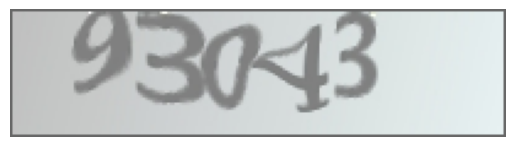

In [111]:
import matplotlib.pyplot as plt

captcha = Image.open('/content/captcha.png')
plt.imshow(captcha)
plt.axis('off')
plt.show()

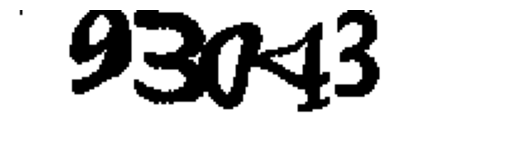

Texto extraído del CAPTCHA: 93043



In [112]:
import pytesseract
from PIL import Image, ImageOps, ImageFilter, ImageEnhance
import matplotlib.pyplot as plt

# 0. Elimina borde
img= ImageOps.crop(captcha, border=0.6)

# 1. Convertir a escala de grises
img = ImageOps.grayscale(img)

# 2. Binarización (umbralización)
threshold = 191  # Ajustar el valor de umbral según la imagen
img = img.point(lambda p: p > threshold and 255)  # Binarización simple

# 2a. Convierte a blanco y negro
img = img.convert('1')

# 3. Eliminar ruido utilizando filtros (opcional)
#img = img.filter(ImageFilter.MedianFilter(size=3))  # Filtrado de mediana para suavizar el ruido

# 4. Aumentar la resolución si es necesario (opcional)
#base_width = 600  # Ajustar el tamaño base según la imagen original
#w_percent = (base_width / float(img.size[0]))
#h_size = int((float(img.size[1]) * float(w_percent)))
#img = img.resize((base_width, h_size), Image.Resampling.LANCZOS)

# 4. Ajuste de contraste
img = ImageOps.grayscale(img)
enhancer = ImageEnhance.Contrast(img)
img = enhancer.enhance(3)  # Aumentar contraste; probá con 1.5–3.0

# Mostrar la imagen procesada (opcional)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789'
captcha_text = pytesseract.image_to_string(img, config=custom_config)

# Mostrar el texto extraído
print("Texto extraído del CAPTCHA:", captcha_text)

In [113]:
driver.find_element(By.XPATH, '//*[@id="cuit"]').send_keys("30525390086")
driver.find_element(By.XPATH, '//*[@id="captchaField"]').send_keys(captcha_text)
driver.find_element(By.XPATH, '//*[@id="btnConsultar"]').click()

In [114]:
screenshot_name = "Screenshot.png"
driver.save_screenshot(screenshot_name)
print("\nScreenshot saved to: %s" % screenshot_name)
driver.quit()


Screenshot saved to: Screenshot.png


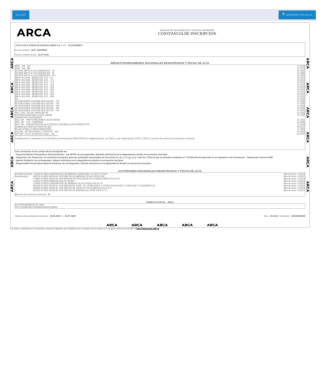

In [115]:
img = Image.open('/content/Screenshot.png')
plt.imshow(img)
plt.axis('off')
plt.show()